## CS164 ASSIGNMENT 1: UNCONSTRAINED OPTIMIZATION

#### Vinícius Miranda

Assignment description available [here](https://course-resources.minerva.kgi.edu/uploaded_files/mke/00079280-1648/assignment1.pdf).

_Relevant HCs:_
- \#algorithms: Implementation of optimization through both multivariable calculus and algorithms is provided. Furthermore, the report offers a comparison between the gradient descent and Newton methods, highlight the improved convergence but higher sensitivity to initial input of the latter.

The cross-section of the drainage channel has the form of a trapezoid. We wish to compute the length of the base $b$ and angle $\theta$ to maximize its area. We know that the area of the trapezoid is given by

$$A = h\cdot\frac{b + B}{2}$$

where b and B are the length of the smaller and larger base, respectively, and h is the height. We can express both B and h in terms of a, the length of the side of the trapezoid, and the angle $\theta$. The expressions are the following:

$$B = b + 2a\cos\theta $$

$$h = a\sin\theta$$

which entails

$$A(a, b, \theta) = a\sin\theta\cdot\frac{b + b + 2a\cos\theta}{2} = a\sin\theta\cdot(b+a\cos\theta).$$

The width of the metal sheet is 3 meters. The solution should thus maximize the constraint $2a + b = 3 \iff a = \frac{1}{2}\cdot(3-b)$. We thus find the final expression of the area to be


$$A(b, \theta) =  \frac{3-b}{2}\sin\theta\cdot(b+\frac{3-b}{2}\cos\theta).$$

The opmization problem can now be expressed as

\begin{equation*}
\begin{aligned}
& \underset{b, \theta}{\text{maximize}}
& & A(b, \theta) \\
& \text{subject to:} 
& & 0 \leq b \leq 3, 0\leq \theta \leq \frac{\pi}{2}
\end{aligned}
\end{equation*}

Note that we enforce the upper bound of $\frac{\pi}{2}$ on $\theta$ because of the symmetry of the sine on the first and second quadrants. Namely, for any $\theta_1$ larger than $\frac{\pi}{2}$, there is a $\theta_2$ smaller than $\frac{\pi}{2}$ which leads to the same height of the trapezoid (i.e., $\sin\theta_1=\sin\theta_2$) but leads to a greater area because it increases the length of the larger base of the trapezoid (i.e., $\cos\theta_1 < \cos\theta_2 \Rightarrow b + 2a\cos\theta_1 < b + 2a\cos\theta_2 $).

This function is visualized in the code cell below.

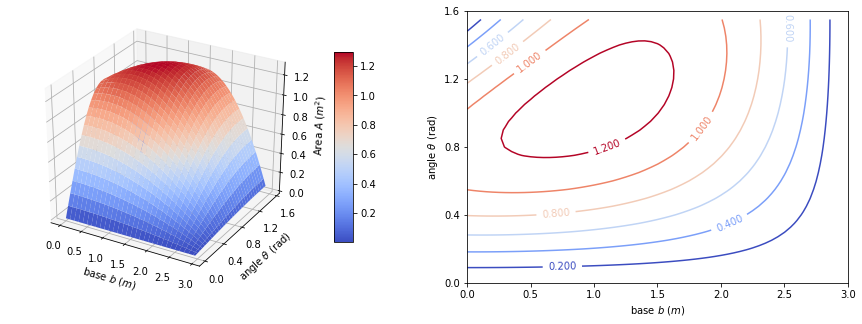

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Preparing figure and axes
fig = plt.figure(figsize=(15, 5))
ax_surf = fig.add_subplot(121, projection='3d')
ax_cont = fig.add_subplot(122)

# Preparing the data
b = np.arange(0, 3, 0.05)
theta = np.arange(0, np.pi/2, 0.05)
b, theta = np.meshgrid(b, theta)
A = (3 - b)/2*np.sin(theta)*(b + (3-b)/2*np.cos(theta))

# Surface plot
surf = ax_surf.plot_surface(b, theta, A, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.7, aspect=10, ax=ax_surf)
ax_surf.set_zlabel(r"Area $A$ $(m^2)$")

# Contour plot
cont = ax_cont.contour(b, theta, A, cmap=cm.coolwarm)
ax_cont.clabel(cont, inline=1, fontsize=10)

# Processing
for ax in [ax_surf,ax_cont]:
    ax.set_xlabel(r"base $b$ $(m)$")
    ax.set_ylabel(r"angle $\theta$ (rad)")
    ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
    ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])

plt.show()

Both the surface and contour plots indicate that there is on single maximum point in the feasible set of the function. On the surface plot, the function seems to increase monotonically towards the maximum, which is also unique given that there are no other peaks, local or otherwise. The contour plot reinforces this impression, as we see that the level curves increasingly approximate a single maximum in the vicinity of $b = 1$ m and $\theta = 1$ rad. If there were more than one extrema, the surface plot would show us two peaks, whereas the contour plot would have at least one level curve close to the extreme value that is discontinuous (e.g., two ellipses instead of one).

### Optimization with Multivariable Calculus

First, we wish to find the critical points of function of the area. In other words, we look for $b$ and $\theta$ such that $\nabla A = \vec{0}$.

$$A(b, \theta) =  \frac{3-b}{2}\sin\theta\cdot(b+\frac{3-b}{2}\cos\theta)$$


$$\frac{\partial A}{\partial b} = -\frac{1}{2}\sin\theta\cdot(b+\frac{3-b}{2}\cos\theta) + \frac{3-b}{2}\sin\theta\cdot(1 - \frac{1}{2}\cos\theta) = \frac{\sin\theta}{2}\left( 3-b+\frac{b-3}{2}\cos\theta -b +\frac{b-3}{2}\cos\theta \right)$$

$$\frac{\partial A}{\partial b} = \frac{\sin\theta}{2}\left( 3-2b +(b-3)\cos\theta \right) = 0 \Rightarrow 3-2b +(b-3)\cos\theta = 0 \text{ if } \sin\theta \neq 0 \Rightarrow \theta \neq 0$$

$$\frac{\partial A}{\partial \theta} = \frac{3-b}{2}\cos\theta\cdot(b+\frac{3-b}{2}\cos\theta) - \frac{3-b}{2}\sin\theta\cdot(\frac{3-b}{2}\sin\theta) $$

$$\frac{\partial A}{\partial \theta} = \frac{3-b}{4}\left(2b\cos\theta + (3-b)\cos^2\theta - (3-b)\sin^2\theta\right) = 0 \Rightarrow 2b\cos\theta + (3-b)\cos^2\theta - (3-b)\sin^2\theta = 0 \text{ if }b\neq3$$

We now solve the system of equations formed by the two partial derivatives. We start by simplifying their expressions.

$$(b-3)\cos\theta=2b-3 \iff \cos\theta = \frac{2b-3}{b-3}$$

$$2b\cos\theta + (3-b)\cos^2\theta - (3-b)\sin^2\theta=0 \iff 2b\cos\theta + (3-b)(\cos^2\theta-\sin^2\theta)=0 \iff 2b\cos\theta + (3-b)(2\cos^2\theta-1)=0$$

$$2b\left(\frac{2b-3}{b-3}\right) - (b-3)(2\left(\frac{2b-3}{b-3}\right)^2-1)=0$$

$$\left(\frac{4b^2-6b}{b-3}\right) - \left(\frac{8b^2 - 24b + 18}{b-3}\right) + b - 3 = 0$$

$$4b^2-6b - 8b^2 + 24b - 18 + b^2 - 6b + 9 = -3b^2 +12b -9 = b^2 -4b + 3 = (b-1)(b-3) = 0 \Rightarrow b = 1$$

The critical point thus exists where the length of the base is equal to 1 meter. We exclude the base length of 3 meters both because of the restrictions applied to the algebraic manipulations and the immediately available insight that with such base, the cross-sectional area would be zero. We can now find the angle at this critical point.

$$\cos\theta=\frac{2\cdot1-3}{1-3}=\frac{1}{2} \Rightarrow \theta = \arccos \frac{1}{2} = \frac{\pi}{3} = 1.047 \text{ rad} =  60°$$

$(1, 1.047)$ is thus the only critical point. We can verify that the point is a maximum, as expected, by applying the second derivative test. To do so, we compute the Hessian and find its determinant at the critical point.

$$\mathcal{H}=\begin{bmatrix} \cos\theta-2 & (3-b)\sin\theta) \\ 1 + 2\cos\theta(1-\cos\theta) & (b-3)\sin2\theta -2b\sin\theta \end{bmatrix}$$

$$\det \mathcal{H}(1, \frac{\pi}{3})=\det\begin{bmatrix} \cos\frac{\pi}{3}-2 & (3-1)\sin\frac{\pi}{3}) \\ 1 + 2\cos\frac{\pi}{3}(1-\cos\frac{\pi}{3}) & (1-3)\sin2\cdot\frac{\pi}{3} -2\cdot1\sin\frac{\pi}{3} \end{bmatrix} = \det\begin{bmatrix} -1.5 & \sqrt{3} \\ 1.5 & -2\sqrt{3} \end{bmatrix}$$

$$\det \mathcal{H}(1, \frac{\pi}{3}) = 3\sqrt{3}-\frac{3\sqrt{3}}{2}=\frac{3\sqrt{3}}{2}$$

Since the determinant is positive and $A_{bb}$ is negative, the critical point is a maximum.  

These results are confirmed by numerical methods in the relevant section in the appendix.

## Optimization Algorithms

The code cell below runs two different algorithms, gradient descent with an exact line search and Newton's method, with two different starting points. The implementation of both methods is available at the end of this notebook.

In [8]:
# Gradient descent is a minimum-finding algorithm. Hence, we search for the negative of the area.
desc_area = lambda x: -area(x)

print("With the starting guess at the boundary:")
desc_boundary_sol = descent_solver(desc_area, (2.999, 0))
newton_boundary_sol = newton_solver(desc_area, (2.999, 0))

print("\nWith the starting guess closer to the maximum:")
desc_goodguess_sol = descent_solver(desc_area, (2, 0.5))
newton_goodguess_sol = newton_solver(desc_area, (2, 0.5))

With the starting guess at the boundary:
Solution found at [0.99999982 1.04719807] in 429 steps. f(x) = -1.30
Solution found at [3. 0.] in 3 steps. f(x) = 0.00

With the starting guess closer to the maximum:
Solution found at [0.9999891 1.0471968] in 76 steps. f(x) = -1.30
Solution found at [ 0.99999999 -1.04719756] in 9 steps. f(x) = 1.30


The gradient descent algorithm diverges for $b = 3$, so we set it to $2.999$. Newton's solver does not converge to a solution from this near-boundary point. With a better guess of the critical point at $b = 2$ and $\theta = 0.5$, both algorithms converge to the correct solution, although Newton's method find a negative $\theta$. Newton's method, however, converges faster. The cell below provides an illustration of the convergence behavior of gradient descent method for the near-boundary point. Some of the code was drawn from Sicotte (2018).

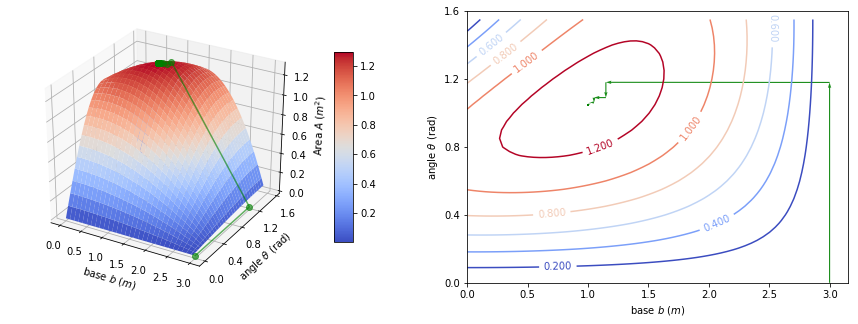

In [9]:
# Preparing figure and axes
fig = plt.figure(figsize=(15, 5))
ax_surf = fig.add_subplot(121, projection='3d')
ax_cont = fig.add_subplot(122)

# Preparing the data
b = np.arange(0, 3, 0.05)
theta = np.arange(0, np.pi/2, 0.05)
b, theta = np.meshgrid(b, theta)
A = (3 - b)/2*np.sin(theta)*(b + (3-b)/2*np.cos(theta))

# From the boundary gradient descent solution
bdesc_inputs = np.array(desc_boundary_sol[0])
bdesc_xs = bdesc_inputs[:,0]
bdesc_ys = bdesc_inputs[:,1]
bdesc_anglesx = bdesc_inputs[1:,0] - bdesc_inputs[:-1, 0]
bdesc_anglesy = bdesc_inputs[1:,1] - bdesc_inputs[:-1, 1]
bdesc_zs = np.array(desc_boundary_sol[2])

# Surface plot
surf = ax_surf.plot_surface(b, theta, A, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.7, aspect=10, ax=ax_surf)
ax_surf.set_zlabel(r"Area $A$ $(m^2)$")
ax_surf.plot(bdesc_xs, bdesc_ys,-bdesc_zs, 
             marker = 'o', color = 'g', alpha = .6, label = 'Gradient descent')

# Contour plot
cont = ax_cont.contour(b, theta, A, cmap=cm.coolwarm)
ax_cont.clabel(cont, inline=1, fontsize=10)
ax_cont.quiver(bdesc_xs[:-1], bdesc_ys[:-1], bdesc_anglesx, bdesc_anglesy, 
               scale_units = 'xy', angles = 'xy', scale = 1, color = 'g', alpha = .9)

# Processing
for ax in [ax_surf,ax_cont]:
    ax.set_xlabel(r"base $b$ $(m)$")
    ax.set_ylabel(r"angle $\theta$ (rad)")
    ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
    ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])

plt.show()

## References

Sicotte, X. B. (2018, Jne 6). Gradient descent impementation python - contour lines. _Stack Overflow_. Retrieved from https://stackoverflow.com/questions/50723432/gradient-descent-impementation-python-contour-lines

## Appendix

In [3]:
from scipy.optimize import fsolve
from numdifftools import Hessian

def area(x):
    b, theta = x
    return((3-b)/2*np.sin(theta)*(b + (3-b)/2*np.cos(theta)))

def eqsystem(x):
    '''Partial derivatives of the area function.'''
    b, theta = x
    eq1 = 3 - 2*b + (b - 3)*np.cos(theta)
    eq2 = 2*b*np.cos(theta) + (3-b)*np.cos(theta)**2 - (3-b)*np.sin(theta)**2
    return (eq1, eq2)

# The critical point
solution = fsolve(eqsystem, (1, 1))

print('Critical point found at b = {:.2f} m and θ = {:.4f} rad. The area is equal to {:.3f} meters.'.format(
    *solution, area(solution)))

# Compute the Hessian and eigenvalues
Hes = Hessian(area)(solution)
eigen_values = np.linalg.eig(Hes)[0]
print("The eigenvalues are {:.3f} and {:.3f}.".format(*eigen_values))

Critical point found at b = 1.00 m and θ = 1.0472 rad. The area is equal to 1.299 meters.
The eigenvalues are -0.394 and -2.853.


We see that the eigenvalues of the Hessian all have the same sign, indicating that the critical point (1, 1.05) is an extremum point. Furthermore, the eigenvalues are negative, showing that this point is a maximum.

In [5]:
from scipy.optimize import approx_fprime
from numpy.linalg import inv

def solver_stats(fun, *args, **kwargs):
    def wrapper(*args, **kwargs):
        a, b, c = fun(*args, **kwargs)
        print("Solution found at {} in {:d} steps. f(x) = {:.2f}".format(a[-1], len(a), args[0](a[-1])))
        return(a, b, c)
    return wrapper

@solver_stats
def descent_solver(func, x0, maxiter=10000):
    '''Gradient descent method Solver.
       Inputs:
       
           - func: Function to minimize
           - x0: Initial input
           
       Outputs: 
       
           - x_history: inputs for all iterations
           - step_size_history: step sizes for all iterations
           - y_history: y value for all iterations
    '''
    
    # Floating point precision, necessary to calculate the gradient
    eps = np.sqrt(np.finfo(float).eps)  
    
    # STEP 0
    k = 0  # iterations
    x = np.array(x0, dtype=float)
    x_history = [np.copy(x)]
    f_history = [func(x)]
    step_size_history = [0]
    
    # Start iterations
    grad = np.ones_like(x)
    while (abs(sum(grad)) > 1e-6):
        
        # STEP 1 - Calculate the direction of steepest descent
        grad = -approx_fprime(x, func, eps)
        
        # STEP 2 - Calculate step size
        h = lambda a: func(x + a*grad)
        
        # Finding upper bound for step size (a_tilde / a_upper)
        # Initial guess
        a_upper = np.array([0.001])
        step_size_slope = approx_fprime(a_upper, h, eps)
        
        # Increase the upper bound until the slope is positive
        while step_size_slope <= 0:
            a_upper *= 2
            step_size_slope = approx_fprime(a_upper, h, eps)
            
        # The bisection algorithm
        k_ba = 0  # Iterations on the bisec. algorithm
        a_lower = 0  # Lower bound
        step_size_slope = 1  # Slope (we wish to find a such that the slope is zero)
                
        while abs(step_size_slope) > 1e-6:
            
            # Pick the middle of the valid interval
            step_size = (a_upper + a_lower) / 2
            step_size_slope = approx_fprime(step_size, h, eps)
            
            # If the slope is greater than zero, the candidate step size is now the upper bound 
            if step_size_slope > 0:
                a_upper = step_size
                
            # If the slope is smaller than zero, the candidate step size is now the lower bound
            else:  
                a_lower = step_size
                
            k_ba += 1
            
        # STEP 3 - Update x
        x += step_size*grad
        step_size_history.append(step_size)
        x_history.append(np.copy(x))
        f_history.append(func(x))
        k += 1
        
        if k > maxiter:
            print("Gradient descent did not converge within {:d} iterations. Returning...".format(maxiter))
            return(0, 0, 0)
    
    return(x_history, step_size_history, f_history)

In [7]:
@solver_stats
def newton_solver(func, x0, maxiter=10000):
    '''Newton's method Solver.
       Inputs:
       
           - func: Function to minimize
           - x0: Initial input
           
       Outputs: 
       
           - x_history: inputs for all iterations
           - step_size_history: step sizes for all iterations
           - y_history: y value for all iterations
    '''
    
    # Floating point precision, necessary to calculate the gradient
    eps = np.sqrt(np.finfo(float).eps)  
    
    # STEP 0
    k = 0  # iterations
    x = np.array(x0, dtype=float)
    x_history = [np.copy(x)]
    f_history = [func(x)]
    step_size_history = [0]
    Hes = Hessian(func)
    
    # Start iterations
    Ndir = np.ones_like(x)
    while (abs(sum(Ndir)) > 1e-6):
        
        # STEP 1 - Compute Newton's direction
        Ndir = - np.matmul(inv(Hes(x)), approx_fprime(x, func, eps))
        
        # STEP 2 - Calculate step size
        step_size = 1
            
        # STEP 3 - Update x
        x += step_size*Ndir
        step_size_history.append(step_size)
        x_history.append(np.copy(x))
        f_history.append(func(x))
        k += 1
        
        if k > maxiter:
            print("\nNewton's method did not converge within {:d} iterations. Returning...".format(maxiter))
            return(x_history, step_size_history, f_history)
    
    return(x_history, step_size_history, f_history)